# 딥러닝 실습 - MNIST Dataset

1.   데이터 불러오기
2.   데이터 탐색 및 전처리
3.   모델 구성
4.   모델 훈련
5.   모델 검증

---


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix

##1. 데이터 불러오기

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##2. 데이터 탐색 및 전처리

In [3]:
print('x_train :', x_train.shape, '\ty_train :', y_train.shape)
print('x_test :', x_test.shape, '\ty_test :', y_test.shape)

num_classes = len(np.unique(y_train))
img_width = x_train.shape[1]
img_height = x_train.shape[2]

x_train : (60000, 28, 28) 	y_train : (60000,)
x_test : (10000, 28, 28) 	y_test : (10000,)


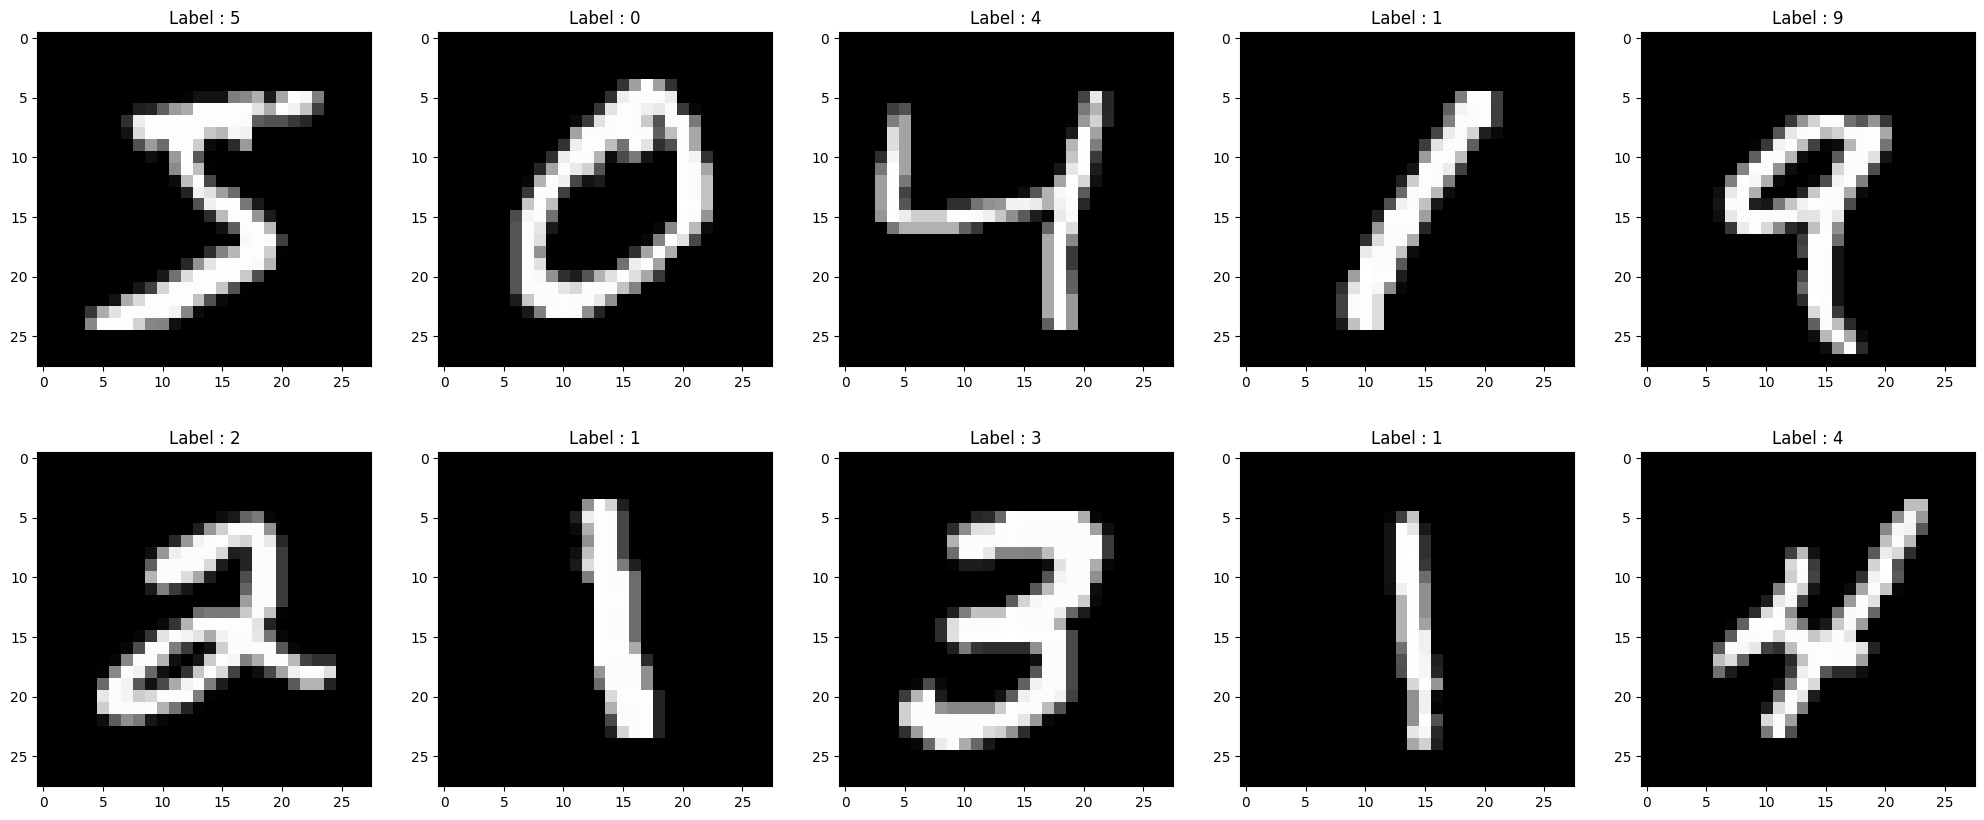

In [4]:
# 데이터 확인
f, ax = plt.subplots(2, 5, figsize=(25,10))
for i in range(0,10):
  ax[i//5][i%5].imshow(x_train[i], cmap='gray')
  ax[i//5][i%5].set_title('Label : ' + str(y_train[i]))
plt.show()

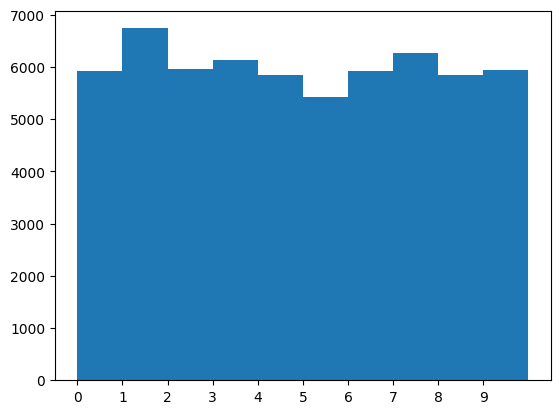

In [5]:
# 데이터 분포 확인
plt.hist(y_train, bins=[i for i in range(0,11)])
plt.xticks([i for i in range(0,num_classes)])
plt.show()

In [6]:
# 데이터 전처리
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

print('x_train :', x_train.shape, '\ty_train :', y_train.shape)
print('x_test :', x_test.shape, '\ty_test :', y_test.shape)

x_train : (60000, 784) 	y_train : (60000, 10)
x_test : (10000, 784) 	y_test : (10000, 10)


In [7]:
# 데이터 정규화
x_train = x_train/255
x_test = x_test/255

In [8]:
# 훈련셋/검증셋 분리
xy_train = np.column_stack((x_train,y_train))
np.random.shuffle(xy_train)

xy_val = xy_train[:int(xy_train.shape[0]/5)]
xy_train = xy_train[int(xy_train.shape[0]/5):]

print('xy_val :', xy_val.shape, '\t\t\txy_train :', xy_train.shape)

x_val = xy_val[:,:-10]
y_val = xy_val[:,-10:]
x_train = xy_train[:,:-10]
y_train = xy_train[:,-10:]

print('x_val :', x_val.shape, '\ty_val :', y_val.shape, '\tx_train :', x_train.shape, '\ty_train :', y_train.shape)

xy_val : (12000, 794) 			xy_train : (48000, 794)
x_val : (12000, 784) 	y_val : (12000, 10) 	x_train : (48000, 784) 	y_train : (48000, 10)


##3. 모델 구성

In [9]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=[x_train.shape[1]]))
model.add(Dense(48, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 48)                  │           3,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             588 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,078 (211.24 KB)

 Trainable params: 54,078 (211.24 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# example test
model.predict(x_train[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step


array([[0.10324063, 0.06981471, 0.08171929, 0.15794292, 0.11763684,
        0.11386576, 0.08976393, 0.12497285, 0.07260317, 0.06843989],
       [0.10209382, 0.074637  , 0.08520707, 0.12727022, 0.10395586,
        0.09398524, 0.10709929, 0.13350385, 0.10096358, 0.07128406],
       [0.09698407, 0.08506586, 0.10509569, 0.12354217, 0.11151505,
        0.10061865, 0.09314492, 0.10818437, 0.09191942, 0.08392981],
       [0.10238841, 0.08011489, 0.1013765 , 0.11369264, 0.11772179,
        0.09616011, 0.10169394, 0.10943213, 0.08734629, 0.09007329],
       [0.087554  , 0.08096846, 0.11310501, 0.1558981 , 0.12735634,
        0.09519427, 0.07375403, 0.12809998, 0.0721508 , 0.06591903],
       [0.14095888, 0.06533288, 0.07637686, 0.11696045, 0.09901473,
        0.14632742, 0.09582185, 0.09802155, 0.08588152, 0.075304  ],
       [0.10454427, 0.08328924, 0.10271722, 0.11457632, 0.11005694,
        0.10607444, 0.09590182, 0.1029784 , 0.09214827, 0.08771309],
       [0.11468858, 0.08064626, 0.0956370

##4. 모델 훈련

In [12]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val,y_val),epochs=50, batch_size=128)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5754 - loss: 1.3916 - val_accuracy: 0.8687 - val_loss: 0.6192
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8830 - loss: 0.5629 - val_accuracy: 0.8661 - val_loss: 0.4061
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9144 - loss: 0.3350 - val_accuracy: 0.9434 - val_loss: 0.2057
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9449 - loss: 0.2005 - val_accuracy: 0.9478 - val_loss: 0.1826
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9538 - loss: 0.1665 - val_accuracy: 0.9565 - val_loss: 0.1523
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9588 - loss: 0.1458 - val_accuracy: 0.9582 - val_loss: 0.1428
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9649 - loss: 0.1291 - val_accuracy: 0.9604 - val_loss: 0.1338
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9661 - loss: 0.1174 - val_accuracy: 0.

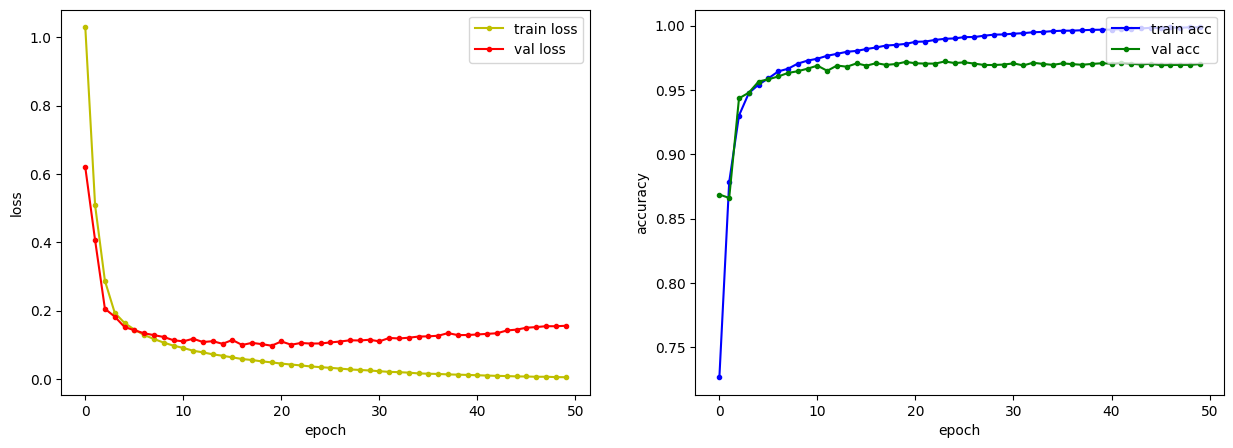

In [13]:
# 학습 확인
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(history.history['loss'], 'y.-', label='train loss')
ax[0].plot(history.history['val_loss'], 'r.-', label='val loss')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend(loc='upper right')

ax[1].plot(history.history['accuracy'], 'b.-', label='train acc')
ax[1].plot(history.history['val_accuracy'], 'g.-', label='val acc')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend(loc='upper right')

plt.show()

##5. 모델 검증

In [14]:
# test data를 이용한 평가
y_eval = model.evaluate(x_test, y_test)
print(y_eval)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9666 - loss: 0.1901
[0.17437119781970978, 0.9710000157356262]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


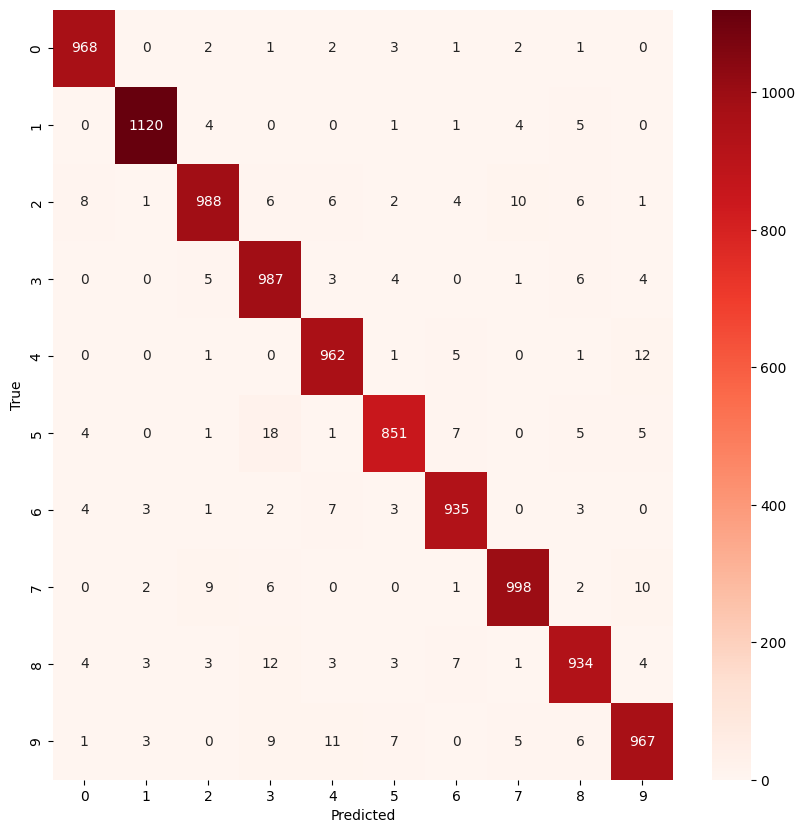

In [15]:
# 예측 결과 확인
y_hat = model.predict(x_test)

plt.figure(figsize = (10,10))
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(y_hat, axis=-1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Reds')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
# 오차 행렬 확인
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(y_hat, axis=-1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.95      0.96       892
           6       0.97      0.98      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



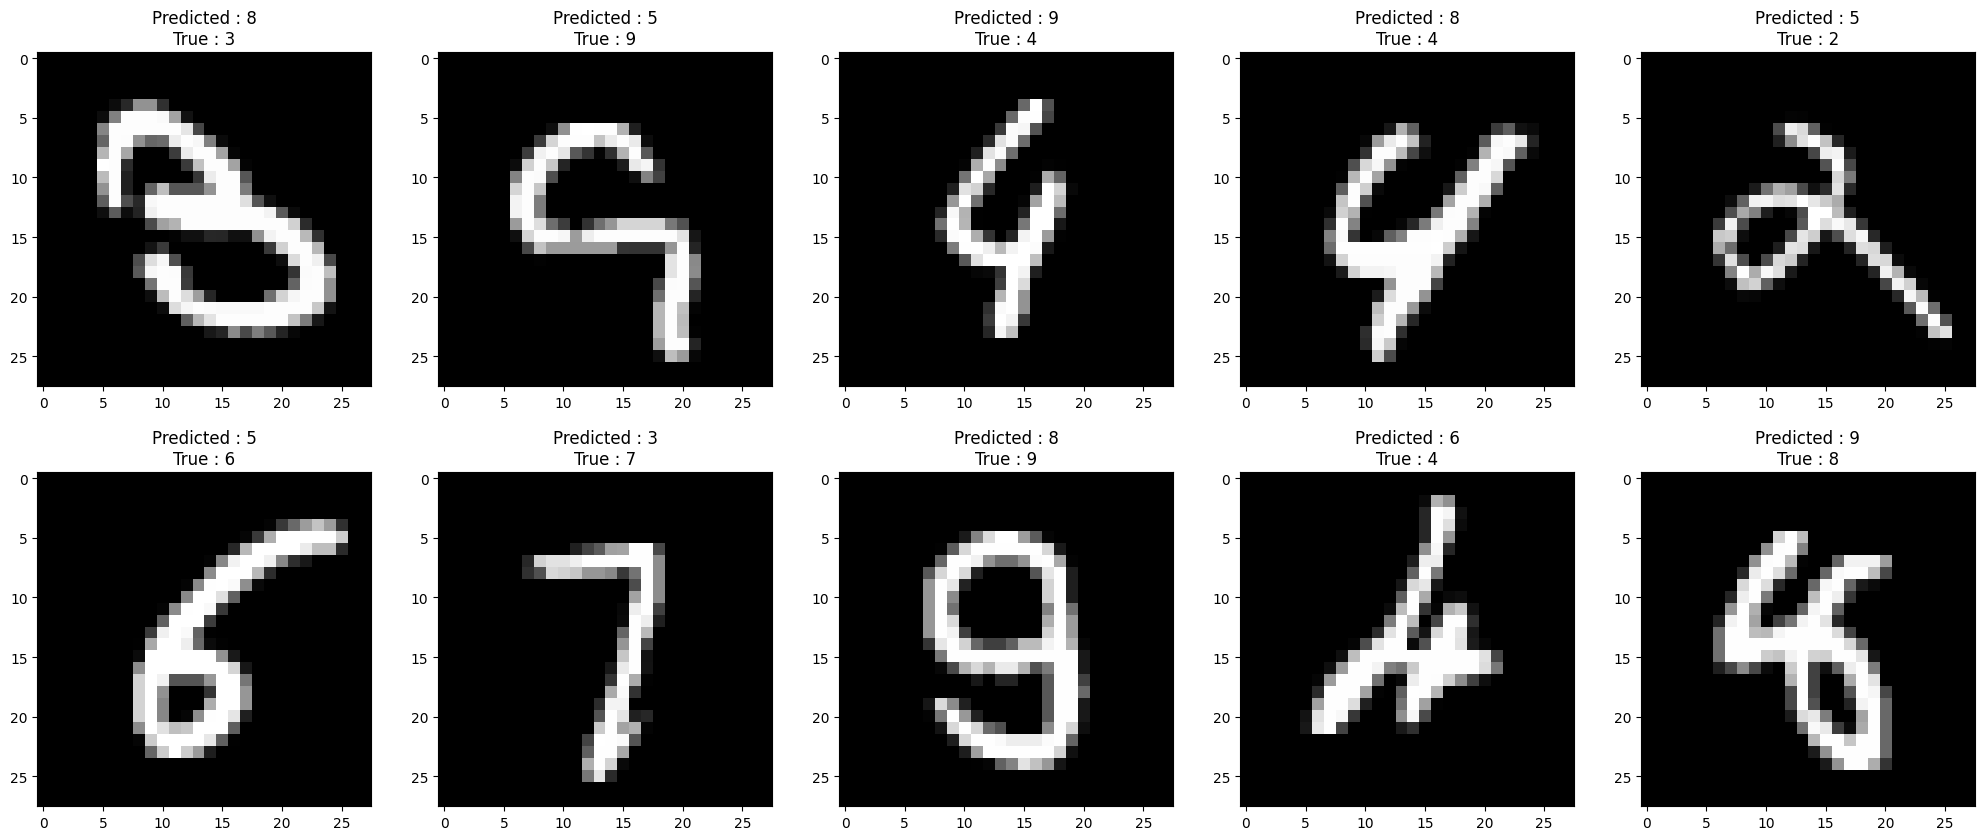

In [18]:
# 오류 데이터 확인
error_idx = np.argmax(y_hat, axis=-1) != np.argmax(y_test, axis=-1) # Remove the extra brackets to get the boolean array directly
errors = x_test[error_idx] * 255
errors = errors.reshape([errors.shape[0], img_height, img_width])
errors_true = np.argmax(y_test, axis=-1)[error_idx]
errors_pred = np.argmax(y_hat, axis=-1)[error_idx]


f, ax = plt.subplots(2, 5, figsize=(25,10))
for i in range(0,10):
  ax[i//5][i%5].imshow(errors[i], cmap='gray')
  ax[i//5][i%5].set_title('Predicted : ' + str(errors_pred[i]) + '\n' + 'True : ' + str(errors_true[i]))
plt.show()